# 03 Post processing precursors for restarts

This Jupyter Notebook gives an example to post process precursor files so as to restart it with or without OpenFAST turbines.
This notebook helps to create an AMR-Wind input file for restarting the precursor files

In [1]:
from moa_python.post_precursor import Post_precursor
import os
import numpy as np
%matplotlib notebook

In [2]:
precursor_folder = '../example_precursors'
precursor_input_file = 'precursor.i'
stats_file = 'abl_statistics14400.nc'
t_start = 7200
t_end = 10800
restart_folder = '../example_precursors/restart'
restart_input_file = 'simulation.i'

In [3]:
abl_stats = Post_precursor(precursor_folder, precursor_input_file, restart_folder, restart_input_file)
abl_stats.read_input_file('precursor')

Creating restart input file based on precursor input file ../example_precursors/precursor.i.


In [4]:
abl_stats.add_runtime_stats(stats_file, t_start, t_end)
# bndry_file_folder = '/projects/ssc/jfrederi/precursors-amr-wind/neutral_lowti_3600s/precursor/bndry_files'
bndry_file_folder = '/scratch/jfrederi/moa_python/initial_case_studies/030_precursor_neutral_v2/precursor/bndry_files'
# restart_file = '/projects/ssc/jfrederi/precursors-amr-wind/neutral_lowti_3600s/precursor/output_files/chk14400'
restart_file = '/scratch/jfrederi/moa_python/initial_case_studies/030_precursor_neutral_v2/precursor/output_files/chk14400'
abl_stats.general_precursor_to_restart(fixed_dt=0.05, bndry_file=bndry_file_folder, \
                                           periodicity=[0, 0, 0], restart_file=restart_file)

ABL statistics file abl_statistics14400.nc loaded succesfully.
Temperature file succesfully written to '../example_precursors/restart/avg_theta.dat'.


<IPython.core.display.Javascript object>


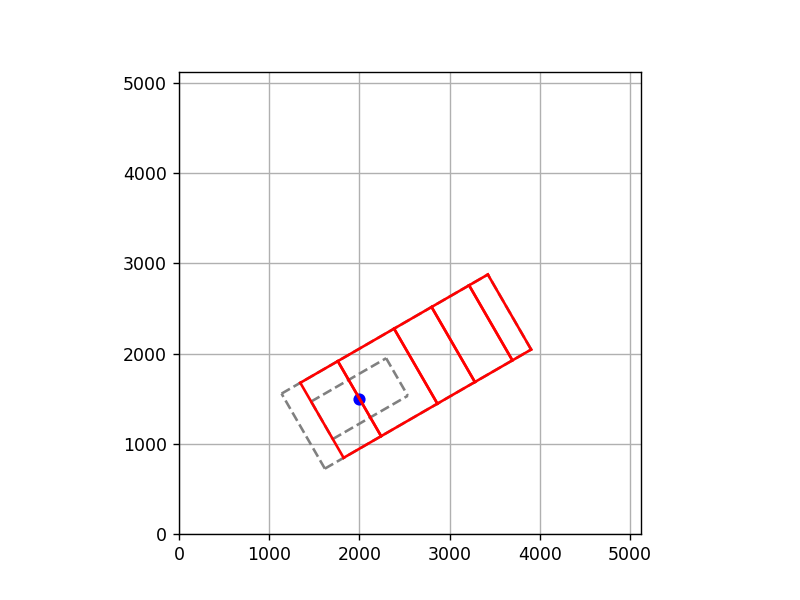

In [5]:
xbndry = [0, 5120]
ybndry = [0, 5120]
turb_loc = [2000, 1500, 0]
rot_diam = 240
hub_height = 150
angle = 30
abl_stats.define_flowfield_geo(xbndry, ybndry, turb_loc, rot_diam, hub_height, angle)

In [6]:
# Refinement around turbine
x_coor_0 = [-3, 8]
y_coor_0 = [-2, 2]
z_coor_0 = [0, 380]

x_coor_1 = [-2, 2]
y_coor_1 = [1, -1]
z_coor_1 = [0, 310]

abl_stats.clear_refinements()
abl_stats.apply_box_refinement('level_0', x_coor_0, y_coor_0, z_coor_0, level=0)
abl_stats.apply_box_refinement('level_1', x_coor_1, y_coor_1, z_coor_1, level=1)

In [7]:
plane_start = [-2, -2, 0]
plane_end = [8, 2, 0]
abl_stats.apply_sampling_plane("samplingPlane",plane_start, plane_end, dx=4)
slice_start = [0, 2, 0]
slice_end = [0, -2, 300/rot_diam]
abl_stats.apply_sampling_plane("samplingSlice",slice_start, slice_end, offsets=[0,3,5,7], dx=4)

In [8]:
num_points_blade = 300
num_points_tower = 11
epsilon = [5.0, 5.0, 5.0]
epsilon_tower = [5.0, 5.0, 5.0]
start_time = 0.0
stop_time = 500.0
abl_stats.apply_turbine('WTG01',rotor_diameter=rot_diam, hub_height=hub_height, num_points_blade=num_points_blade, num_points_tower=num_points_tower, \
                           epsilon=epsilon, epsilon_tower=epsilon_tower, openfast_start_time=start_time, openfast_stop_time=stop_time)

In [9]:
abl_stats.generate_restart_input_file()

Input file ../example_precursors/restart/simulation.i already exists.
File will be overwritten.


In [10]:
abl_stats.input_file

['#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨#\n',
 '#            SIMULATION STOP            #\n',
 '#.......................................#\n',
 'time.stop_time                           = 10800.0     # Max (simulated) time to evolve\n',
 'time.max_step                            = -1          # Max number of time steps\n',
 'time.fixed_dt                            = 0.05\n',
 'time.cfl                                 = 0.95        # CFL factor\n',
 '\n',
 '#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨#\n',
 '#            INPUT AND OUTPUT           #\n',
 '#.......................................#\n',
 'time.plot_interval                       = 3600       # Steps between plot files\n',
 'time.checkpoint_interval                 = 3600       # Steps between checkpoint files\n',
 'io.check_file                            = "output_files/chk"\n',
 'io.plot_file                             = "output_files/plt"\n',
 'ABL.bndry_file                           = /scratch/jfrederi/moa_python/initi

In [ ]:
vec = np.array([[cos,sin,0],[0,0,1]])
vec[0]
direction = 'xy'
xyz = np.array(['x','y','z'])
transform = np.matrix([[cos, sin, 0],[sin, -cos, 0],[0, 0, 1]])
direction = np.array([np.array(['x','y','z'])==direction[0],np.array(['x','y','z'])==direction[1]]).astype(int)
np.array(direction*transform)

In [ ]:
sin = 0.5
cos = np.sqrt(3)/2
transform = np.matrix([[cos, sin, 0],[sin, cos, 0],[0, 0, 1]])
begin = [-2, -2, 0]
end = [8, 2, 0]
(plane_start*transform)*rot_diam

In [11]:
abl_stats.turbines

{'label': ['WTG01'],
 'type': 'TurbineFastLine',
 'WTG01': {'base_position': array([8.33333333, 6.25      , 0.        ])},
 'TurbineFastLine': {'openfast_stop_time': 500.0}}